In [21]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [22]:
# Inisialisasi data
data = {
    "No": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
    "No. Serbuk": ["MA-03138/2019", "MA-03291/2019", "BJ-01594/2019", "BJ-01625/2019", "MA-03290/2019", 
                   "MA-03248/2019", "MA-03249/2019", "MA-03220/2019", "BJ-01621/2019", "BJ-01604/2019", 
                   "MA-03195/2019", "MA-03247/2019", "BJ-01639/2019", "MA-03271/2019", "MA-03321/2019", 
                   "BJ-01650/2019", "BJ-01628/2019", "BJ-01660/2019", "BJ-01651/2019", "MA-03289/2019", 
                   "BJ-01538/2019", "BJ-01538/2019", "MA-03183/2019", "MA-03196/2019", "MA-03037/2019", 
                   "MA-03092/2019"],
    "Baik": [117, 650, 450, 50, 305, 170, 367, 178, 160, 322, 356, 500, 303, 167, 180, 452, 83, 70, 150, 150, 300, 300, 503, 785, 493, 193],
    "Tafir": [90, 41, 50, 80, 20, 25, 30, 30, 20, 60, 40, 30, 30, 38, 0, 47, 11, 0, 30, 75, 17, 17, 86, 8, 32, 32],
    "Jumlah Butir": [207, 691, 500, 130, 325, 195, 397, 208, 180, 382, 396, 530, 333, 205, 180, 499, 94, 70, 180, 225, 317, 317, 589, 793, 525, 225]
}

df = pd.DataFrame(data)

In [23]:
# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(row, medoid):
    return np.sqrt((row['Baik'] - medoid['Baik'])**2 + (row['Tafir'] - medoid['Tafir'])**2 + (row['Jumlah Butir'] - medoid['Jumlah Butir'])**2)

# Fungsi untuk memilih medoid baru yang berbeda
def pilih_medoid_baru(df, medoids_sebelumnya):
    while True:
        medoid_baru = df.sample(n=3, random_state=random.randint(0, 100)).reset_index(drop=True)
        if not medoid_baru.equals(medoids_sebelumnya):
            return medoid_baru

# Iterasi
iterasi = 1
prev_total_cost = None

# Simpan DataFrame untuk iterasi kedua terakhir dan terakhir
second_last_df = None
last_df = None

# Iterasi pertama
medoids = df.sample(n=3, random_state=1).reset_index(drop=True)

df['Jarak Ke Cluster 1'] = df.apply(lambda row: euclidean_distance(row, medoids.iloc[0]), axis=1)
df['Jarak Ke Cluster 2'] = df.apply(lambda row: euclidean_distance(row, medoids.iloc[1]), axis=1)
df['Jarak Ke Cluster 3'] = df.apply(lambda row: euclidean_distance(row, medoids.iloc[2]), axis=1)

df['Jarak Terpendek'] = df[['Jarak Ke Cluster 1', 'Jarak Ke Cluster 2', 'Jarak Ke Cluster 3']].min(axis=1)
df['Jenis Cluster'] = df[['Jarak Ke Cluster 1', 'Jarak Ke Cluster 2', 'Jarak Ke Cluster 3']].idxmin(axis=1).str.split().str[-1]

total_cost = df['Jarak Terpendek'].sum()
current_cost = total_cost
prev_total_cost = total_cost

print(f"DataFrame Iterasi Pertama:\n{df}")
print(f"Total Cost Iterasi Pertama: {total_cost}")


DataFrame Iterasi Pertama:
    No     No. Serbuk  Baik  Tafir  Jumlah Butir  Jarak Ke Cluster 1  \
0    1  MA-03138/2019   117     90           207           73.607065   
1    2  MA-03291/2019   650     41           691          715.011888   
2    3  BJ-01594/2019   450     50           500          439.089968   
3    4  BJ-01625/2019    50     80           130          122.474487   
4    5  MA-03290/2019   305     20           325          212.485294   
5    6  MA-03248/2019   170     25           195           25.495098   
6    7  MA-03249/2019   367     30           397          306.884343   
7    8  MA-03220/2019   178     30           208           39.597980   
8    9  BJ-01621/2019   160     20           180           14.142136   
9   10  BJ-01604/2019   322     60           382          266.998127   
10  11  MA-03195/2019   356     40           396          298.650297   
11  12  MA-03247/2019   500     30           530          494.974747   
12  13  BJ-01639/2019   303     30   

In [24]:
while True:
    iterasi += 1
    medoids_baru = pilih_medoid_baru(df, medoids)
    
    df['Jarak Ke Cluster 1'] = df.apply(lambda row: euclidean_distance(row, medoids_baru.iloc[0]), axis=1)
    df['Jarak Ke Cluster 2'] = df.apply(lambda row: euclidean_distance(row, medoids_baru.iloc[1]), axis=1)
    df['Jarak Ke Cluster 3'] = df.apply(lambda row: euclidean_distance(row, medoids_baru.iloc[2]), axis=1)
    
    df['Jarak Terpendek'] = df[['Jarak Ke Cluster 1', 'Jarak Ke Cluster 2', 'Jarak Ke Cluster 3']].min(axis=1)
    df['Jenis Cluster'] = df[['Jarak Ke Cluster 1', 'Jarak Ke Cluster 2', 'Jarak Ke Cluster 3']].idxmin(axis=1).str.split().str[-1]
    
    current_cost = df['Jarak Terpendek'].sum()
    
    print(f"DataFrame Iterasi {iterasi}:\n{df}")
    print(f"Total Cost Iterasi {iterasi}: {current_cost}")
    
    # Simpan DataFrame untuk iterasi terakhir dan kedua terakhir
    if last_df is not None:
        second_last_df = last_df.copy()
    last_df = df.copy()
    
    # Cek kondisi penghentian
    if current_cost - prev_total_cost > 0:
        break
    else:
        prev_total_cost = current_cost
        medoids = medoids_baru

print(f"DataFrame Iterasi Kedua Terakhir Sebelum Penghentian:\n{second_last_df}")
print(f"Total Cost Akhir: {prev_total_cost}")


DataFrame Iterasi 2:
    No     No. Serbuk  Baik  Tafir  Jumlah Butir  Jarak Ke Cluster 1  \
0    1  MA-03138/2019   117     90           207           86.475430   
1    2  MA-03291/2019   650     41           691          708.281018   
2    3  BJ-01594/2019   450     50           500          432.897216   
3    4  BJ-01625/2019    50     80           130          134.907376   
4    5  MA-03290/2019   305     20           325          205.060967   
5    6  MA-03248/2019   170     25           195           18.708287   
6    7  MA-03249/2019   367     30           397          300.063327   
7    8  MA-03220/2019   178     30           208           34.756294   
8    9  BJ-01621/2019   160     20           180            0.000000   
9   10  BJ-01604/2019   322     60           382          262.007633   
10  11  MA-03195/2019   356     40           396          292.355947   
11  12  MA-03247/2019   500     30           530          488.057374   
12  13  BJ-01639/2019   303     30         

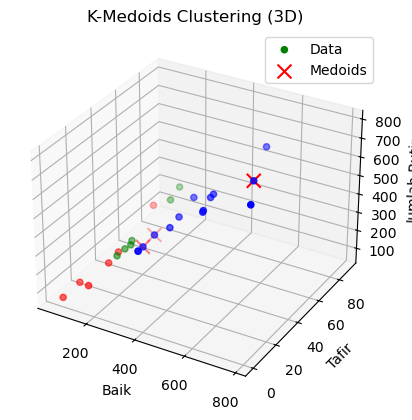

In [25]:
# Plot 3D dengan medoids dari 2 iterasi sebelum penghentian
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Data points
colors = {'1': 'red', '2': 'green', '3': 'blue'}
ax.scatter(second_last_df['Baik'], second_last_df['Tafir'], second_last_df['Jumlah Butir'], 
           c=second_last_df['Jenis Cluster'].map(colors), label='Data')

# Medoids dari 2 iterasi sebelum penghentian
medoids_before_last = pilih_medoid_baru(df, second_last_df[['Baik', 'Tafir', 'Jumlah Butir']])
ax.scatter(medoids_before_last['Baik'], medoids_before_last['Tafir'], medoids_before_last['Jumlah Butir'], c='red', marker='x', s=100, label='Medoids')

ax.set_xlabel('Baik')
ax.set_ylabel('Tafir')
ax.set_zlabel('Jumlah Butir')
ax.set_title('K-Medoids Clustering (3D)')
ax.legend()
plt.show()